In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from LinearRegression import LinearRegression

### Dataset Exploration & Cleaning

In [15]:
data_path = Path.cwd()
df = pd.read_csv(data_path / 'FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [16]:
# Drop str features
df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis=1, inplace=True)
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [9]:
# Check for NaN values
df.isna().sum()

ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

<Axes: >

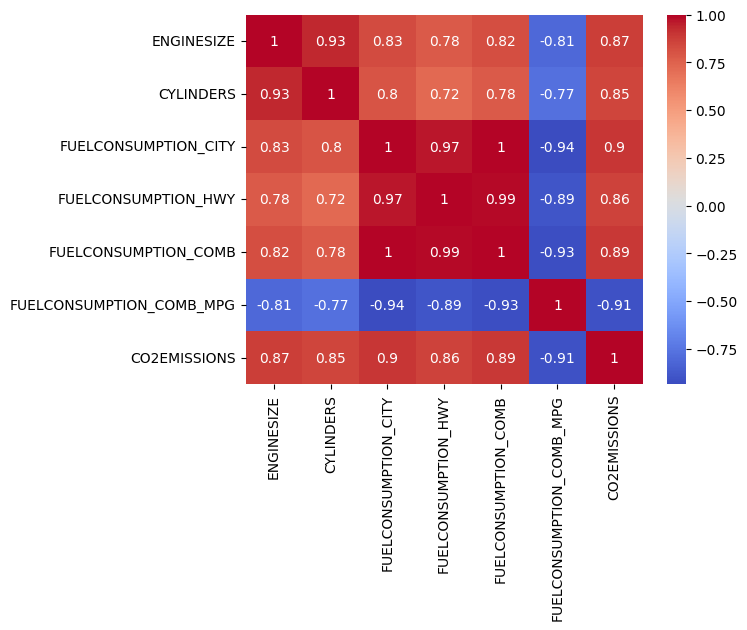

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

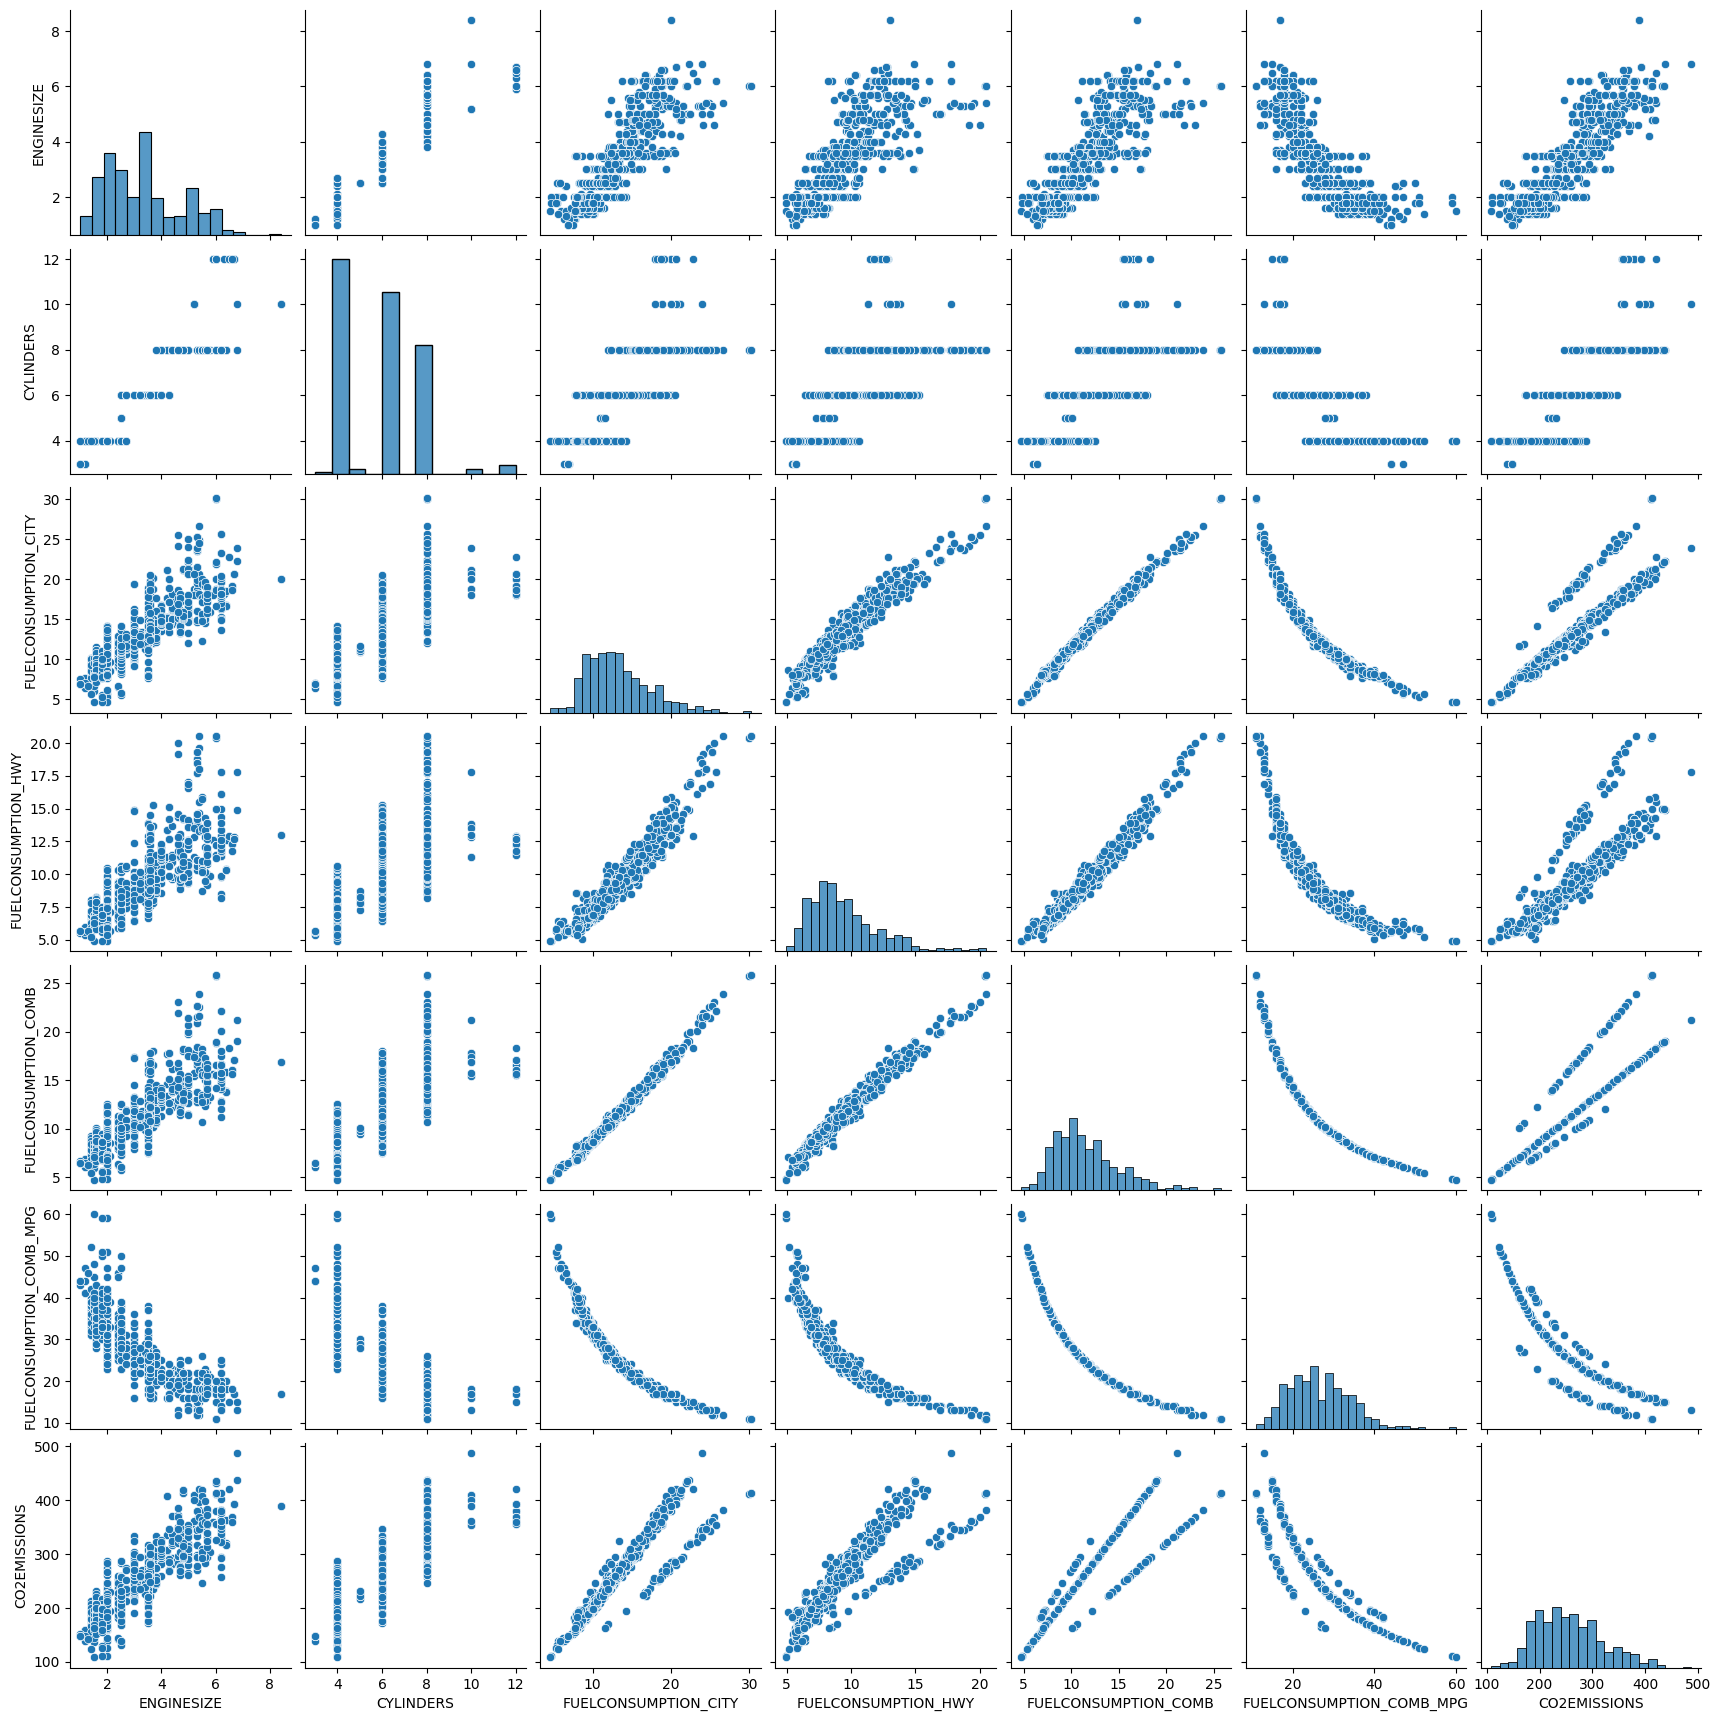

In [12]:
sns.pairplot(df)

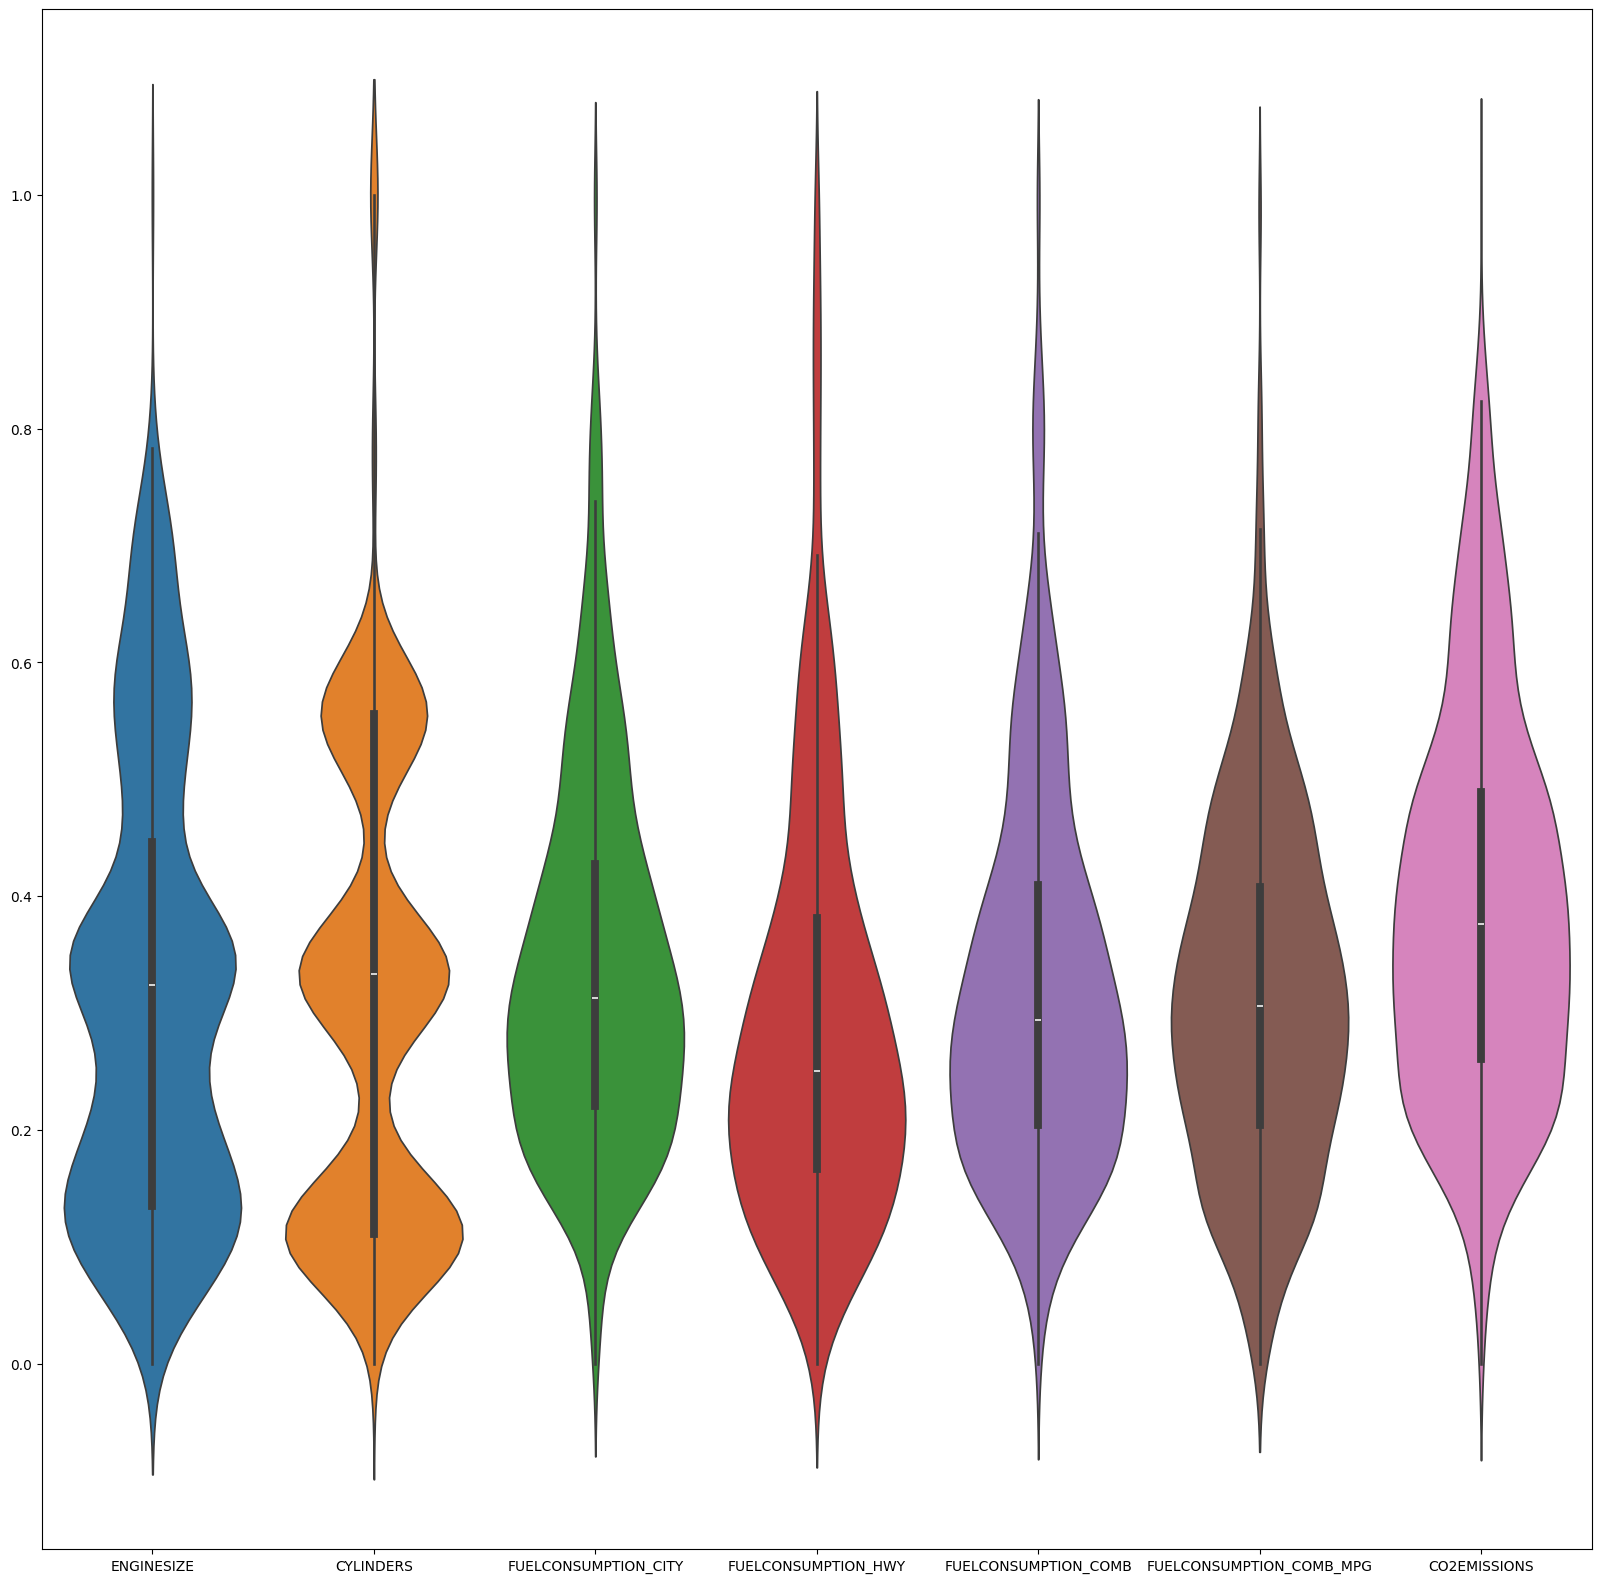

In [22]:
# scale and visualize distribution
arr = np.array(df)
arr = (arr - np.min(arr, axis=0))/(np.max(arr, axis=0) - np.min(arr, axis=0))
arr = pd.DataFrame(arr, columns=df.columns)
plt.figure(figsize=(20,20))
sns.violinplot(arr)
plt.show()

### Dataset cleaning

In [28]:
# Choose features to predict
feature_names = df.columns[:-1]
X, y = df[feature_names].to_numpy(), df[df.columns[-1]].to_numpy().reshape(-1,1)
print(f'Features: {feature_names}\n\tShape: {X.shape}\n\nIndex: {df.columns[-1]}\n\tShape: {y.shape}')

Features: Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')
	Shape: (1067, 6)

Index: CO2EMISSIONS
	Shape: (1067, 1)


### Linear Regression

Itération 000000: MSE=2.8854E+04
Itération 001000: MSE=4.9824E+03
Itération 002000: MSE=2.3187E+03
Itération 003000: MSE=1.8137E+03
Itération 004000: MSE=1.5625E+03
Itération 005000: MSE=1.3692E+03
Itération 006000: MSE=1.2090E+03
Itération 007000: MSE=1.0748E+03
Itération 008000: MSE=9.6246E+02
Itération 009000: MSE=8.6828E+02
Itération 010000: MSE=7.8935E+02
Itération 011000: MSE=7.2318E+02
Itération 012000: MSE=6.6772E+02
Itération 013000: MSE=6.2121E+02
Itération 014000: MSE=5.8222E+02
Itération 015000: MSE=5.4951E+02
Itération 016000: MSE=5.2207E+02
Itération 017000: MSE=4.9905E+02
Itération 018000: MSE=4.7972E+02
Itération 019000: MSE=4.6349E+02
Itération 020000: MSE=4.4986E+02
Itération 021000: MSE=4.3840E+02
Itération 022000: MSE=4.2876E+02
Itération 023000: MSE=4.2064E+02
Itération 024000: MSE=4.1381E+02
Itération 025000: MSE=4.0805E+02
Itération 026000: MSE=4.0318E+02

Fit process ended with success after 26657 iterations
MSE = 400.39986378905354

Classic LinearRegression: R²

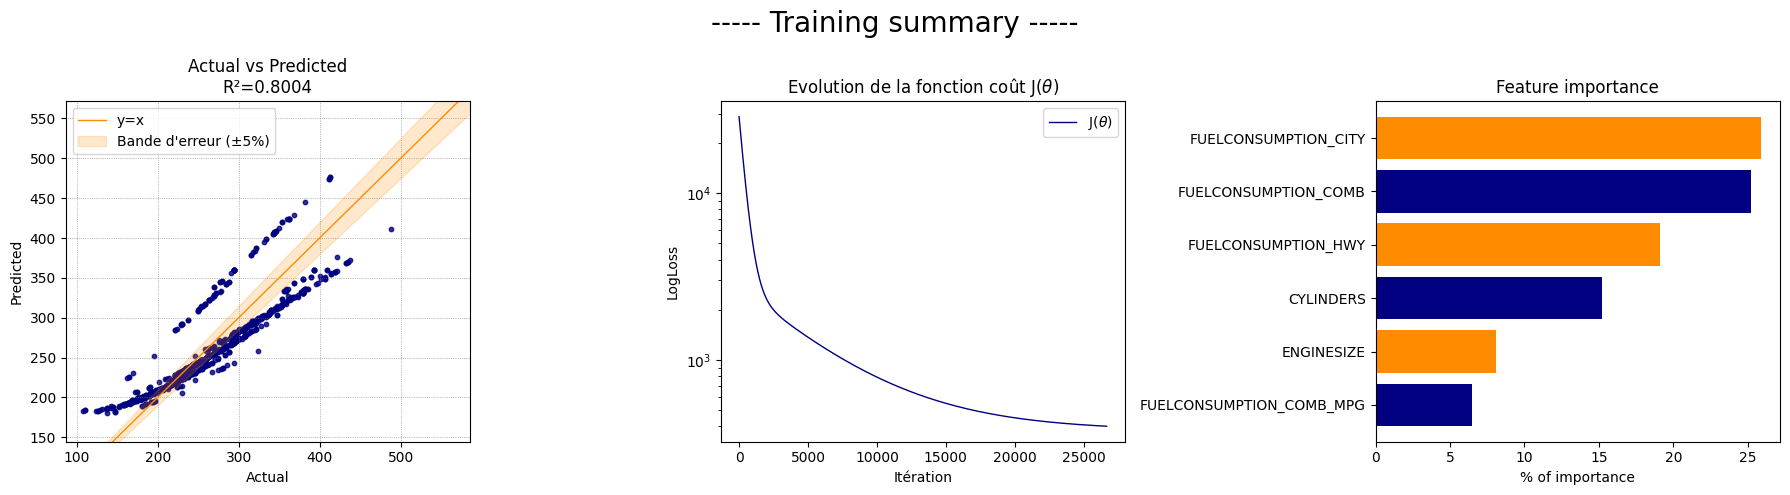

In [30]:
model = LinearRegression(lr=1e-6, eps=1e-5)
model.fit(X, y)
y_pred = model.predict(X)
print(f'Classic LinearRegression: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

### Linear Regression + STANDARDISATION

Itération 000000: MSE=3.4659E+04
Itération 001000: MSE=3.4576E+04
Itération 002000: MSE=3.4494E+04
Itération 003000: MSE=3.4412E+04
Itération 004000: MSE=3.4330E+04
Itération 005000: MSE=3.4248E+04
Itération 006000: MSE=3.4167E+04
Itération 007000: MSE=3.4086E+04
Itération 008000: MSE=3.4005E+04
Itération 009000: MSE=3.3925E+04
Itération 010000: MSE=3.3845E+04
Itération 011000: MSE=3.3765E+04
Itération 012000: MSE=3.3686E+04
Itération 013000: MSE=3.3606E+04
Itération 014000: MSE=3.3527E+04
Itération 015000: MSE=3.3449E+04
Itération 016000: MSE=3.3370E+04
Itération 017000: MSE=3.3292E+04
Itération 018000: MSE=3.3215E+04
Itération 019000: MSE=3.3137E+04
Itération 020000: MSE=3.3060E+04
Itération 021000: MSE=3.2983E+04
Itération 022000: MSE=3.2906E+04
Itération 023000: MSE=3.2830E+04
Itération 024000: MSE=3.2754E+04
Itération 025000: MSE=3.2678E+04
Itération 026000: MSE=3.2602E+04
Itération 027000: MSE=3.2527E+04
Itération 028000: MSE=3.2452E+04
Itération 029000: MSE=3.2377E+04
Itération 

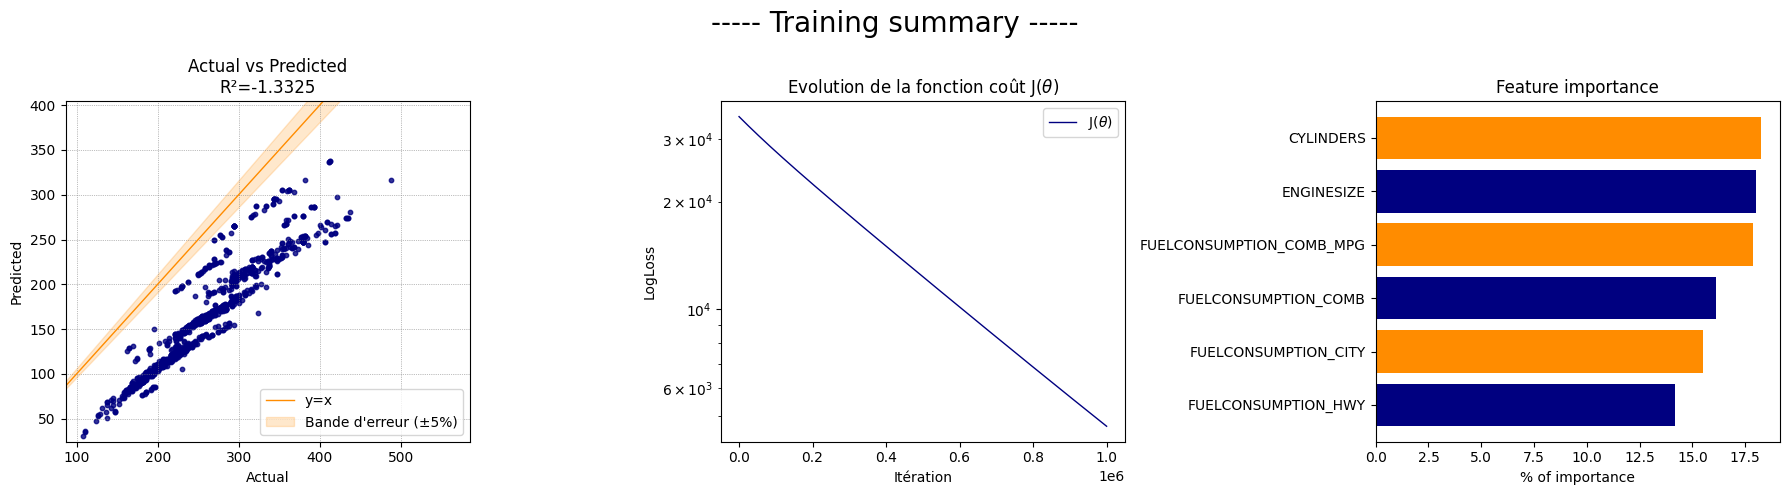

In [34]:
model = LinearRegression(lr=1e-6, eps=1e-10)
model.fit(X, y, standardize=True)
y_pred = model.predict(X)
print(f'LinearRegression + Standardisation: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

### Linear Regression + REGULARIZATION

Itération 000000: MSE=3.0584E+04
Itération 001000: MSE=5.5417E+03
Itération 002000: MSE=2.6675E+03
Itération 003000: MSE=2.1262E+03
Itération 004000: MSE=1.8774E+03
Itération 005000: MSE=1.6940E+03
Itération 006000: MSE=1.5432E+03
Itération 007000: MSE=1.4163E+03
Itération 008000: MSE=1.3087E+03
Itération 009000: MSE=1.2171E+03
Itération 010000: MSE=1.1391E+03
Itération 011000: MSE=1.0725E+03
Itération 012000: MSE=1.0155E+03
Itération 013000: MSE=9.6717E+02
Itération 014000: MSE=9.2662E+02
Itération 015000: MSE=8.9197E+02
Itération 016000: MSE=8.6232E+02
Itération 017000: MSE=8.3693E+02
Itération 018000: MSE=8.1517E+02
Itération 019000: MSE=7.9651E+02
Itération 020000: MSE=7.8048E+02
Itération 021000: MSE=7.6672E+02
Itération 022000: MSE=7.5489E+02
Itération 023000: MSE=7.4472E+02
Itération 024000: MSE=7.3597E+02

Fit process ended with success after 24687 iterations
MSE = 730.6782627545435

LinearRegression + Regularisation: R²=0.7427

Model coefficients:
[[-0.7649103 ]
 [ 1.20123544]

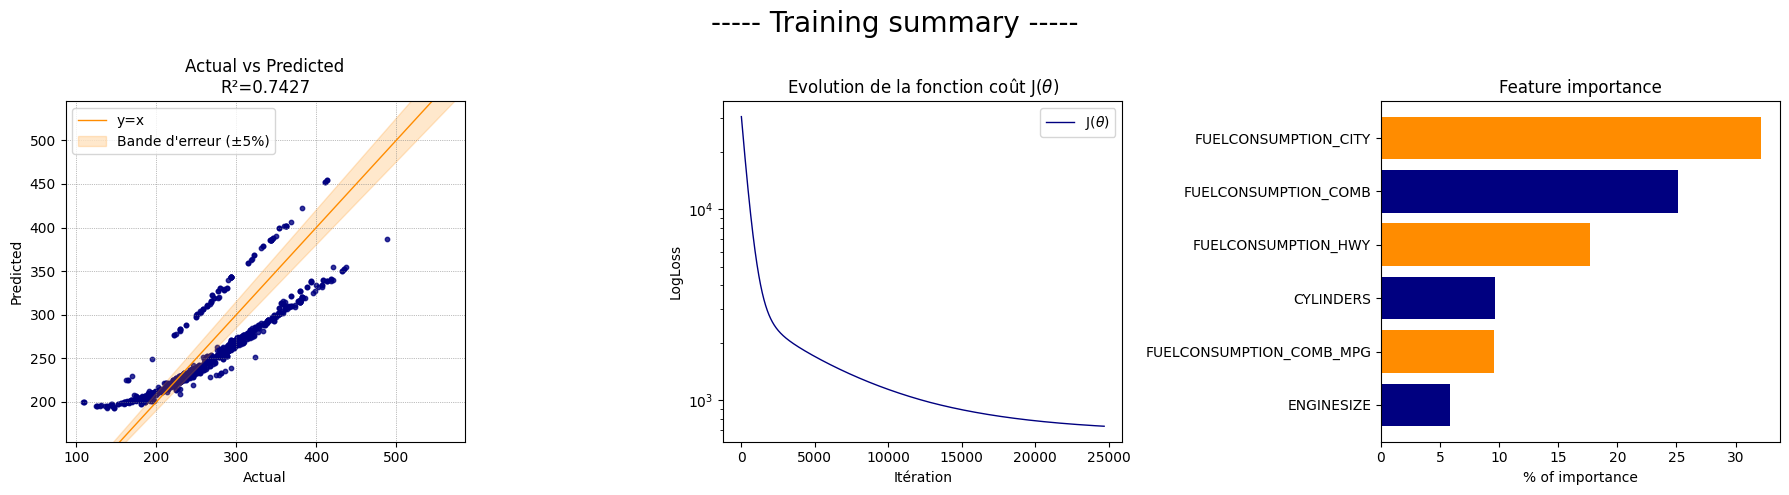

In [38]:
model = LinearRegression(lr=1e-6, eps=1e-5)
model.fit(X, y, regularization='LASSO', penalty=10)
y_pred = model.predict(X)
print(f'LinearRegression + Regularisation: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

# SCIKIT-LEARN Score

In [39]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=1e-6, random_state=42)
sgd.fit(X, y)
sgd.score(X, y)
# sgd.coef_

C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8425291284241487